<a href="https://colab.research.google.com/github/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/borrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [329]:
import pandas as pd
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform
import statistics as stats
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Chapter 4&5
from sklearn.decomposition import PCA

# Chapter 6
from sklearn.decomposition import IncrementalPCA

# Chapter 7
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll

from mpl_toolkits.mplot3d import Axes3D
#from pydiffmap import diffusion_map as dm
#from pydiffmap.visualization import data_plot

# Chapter 8
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import plotly.express as px 
import pandas as pd
url="https://github.com/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/Peliculas.xlsx?raw=true"
datos=pd.read_excel(url)
datos1 = datos.drop(datos.columns[[8,9,10,11,12,13,14,15,16]], axis='columns')
datos1

,Pelicula,Titulo,Clasificacion 1,Clasificacion 2,year,rating,imdbId,tmdbId
0,1,Toy Story,Animation,Children,1995.0,4.0,114709,862.0
1,2,Jumanji,Children,Fantasy,1995.0,4.0,113497,8844.0
2,3,Grumpier Old Men,Romance,no-genres-listed,1995.0,4.5,113228,15602.0
3,4,Waiting to Exhale,Drama,Romance,1995.0,2.5,114885,31357.0
4,5,Father of the Bride Part II,no-genres-listed,no-genres-listed,1995.0,4.5,113041,11862.0
...,...,...,...,...,...,...,...,...
8776,128975,Hot Tub Time Machine 2,Sci-Fi,no-genres-listed,2015.0,4.0,2637294,243938.0
8777,128991,Johnny Express,Comedy,Sci-Fi,2014.0,4.5,3723996,269711.0
8778,129011,Eddie Izzard: Glorious,no-genres-listed,no-genres-listed,1997.0,4.5,195753,13590.0
8779,129229,Northmen - A Viking Saga,Adventure,no-genres-listed,2014.0,5.0,2290553,286873.0


In [330]:
datos1.isnull().sum()


Pelicula            0
Titulo              0
Clasificacion 1     0
Clasificacion 2     0
year               23
rating              0
imdbId              0
tmdbId              8
dtype: int64

In [331]:
datos1['year'].fillna(2000, inplace = True) 
clean_datos=datos1.dropna()
clean_datos.isnull().sum()

Pelicula           0
Titulo             0
Clasificacion 1    0
Clasificacion 2    0
year               0
rating             0
imdbId             0
tmdbId             0
dtype: int64

Si no sabemos el titilo de la pelicula de poco nos serviran el resto de datos,las peliculas sin años tambien pueden ser eliminadas.

In [332]:
text= {
    
  "Pelicula":{
    "0":129333,
    "1":129354,
    "2":129397,
    "3":129428,
    "4":129514,
    "5":129657
  },
  "Titulo":{
    "0":"Julia ",
    "1":"Focus ",
    "2":"Marvel One-Shot: Item 47 ",
    "3":"The Second Best Exotic Marigold Hotel ",
    "4":"George Carlin: It's Bad for Ya! ",
    "5":"Tracers "
  },
  "Clasificacion 1":{
    "0":"no-genres-listed",
    "1":"Thriller",
    "2":"Crime",
    "3":"Fantasy",
    "4":"Drama",
    "5":"no-genres-listed"
  },
  "Clasificacion 2":{
    "0":"no-genres-listed",
    "1":"no-genres-listed",
    "2":"Drama",
    "3":"Sci-Fi",
    "4":"no-genres-listed",
    "5":"no-genres-listed"
  },
  "year":{
    "0":2014,
    "1":2014,
    "2":2015,
    "3":2012,
    "4":2015,
    "5":2008
  },
  "rating":{
    "0":4.5,
    "1":5.0,
    "2":5.0,
    "3":4.5,
    "4":3.0,
    "5":4.5  
  },
  "imdbId":{
    "0":2392672	,
    "1":2582426	,
    "2":2381941	,
    "3":2247732	,
    "4":2555736	,
    "5":963207   
  },
  " tmdbId":{
    "0":179150,
    "1":278632,
    "2":256591,
    "3":119569,
    "4":268238,
    "5":13643	     
  }
}

text=pd.DataFrame(text)
text

,Pelicula,Titulo,Clasificacion 1,Clasificacion 2,year,rating,imdbId,tmdbId
0,129333,Julia,no-genres-listed,no-genres-listed,2014,4.5,2392672,179150
1,129354,Focus,Thriller,no-genres-listed,2014,5.0,2582426,278632
2,129397,Marvel One-Shot: Item 47,Crime,Drama,2015,5.0,2381941,256591
3,129428,The Second Best Exotic Marigold Hotel,Fantasy,Sci-Fi,2012,4.5,2247732,119569
4,129514,George Carlin: It's Bad for Ya!,Drama,no-genres-listed,2015,3.0,2555736,268238
5,129657,Tracers,no-genres-listed,no-genres-listed,2008,4.5,963207,13643


In [333]:
clean_datos.describe()

,Pelicula,year,rating,imdbId,tmdbId
count,8773.000000,8773.00000,8773.000000,8.773000e+03,8773.000000
mean,29743.071127,1993.06349,3.550154,4.449618e+05,32509.722900
std,37551.154399,18.25016,1.036439,6.344673e+05,50090.966545
min,1.000000,1902.00000,0.500000,4.170000e+02,2.000000
25%,2919.000000,1987.00000,3.000000,9.278300e+04,9344.000000
50%,6442.000000,1998.00000,3.500000,1.208150e+05,14240.000000
75%,55269.000000,2006.00000,4.000000,4.264590e+05,34806.000000
max,129250.000000,2018.00000,5.000000,4.368814e+06,503475.000000


In [334]:
clean_datos.groupby("Clasificacion 1")['rating'].mean()

Clasificacion 1
Adventure           3.592727
Animation           3.554124
Children            3.714592
Comedy              3.493772
Crime               3.518600
Documentary         3.695652
Drama               3.598693
Fantasy             3.497890
Film-Noir           3.761905
Horror              3.498447
IMAX                3.900000
Musical             3.481013
Mystery             3.511062
Romance             3.538071
Sci-Fi              3.447552
Thriller            3.587049
War                 3.516129
Western             3.310000
no-genres-listed    3.541124
Name: rating, dtype: float64

In [335]:
clean_datos.groupby("Clasificacion 1")['Clasificacion 1'].count()

Clasificacion 1
Adventure            550
Animation            194
Children             233
Comedy               562
Crime                457
Documentary           46
Drama               1530
Fantasy              237
Film-Noir             42
Horror               322
IMAX                  10
Musical              158
Mystery              226
Romance              788
Sci-Fi               286
Thriller             471
War                  155
Western               50
no-genres-listed    2456
Name: Clasificacion 1, dtype: int64

In [336]:
#Agrupando la cantidad de peliculas por genero
h=["Adventure","Animation","Children","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","IMAX","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western","no-genres-listed"] 
J=[]
for e in range(19):   
 J.append(clean_datos.apply(lambda x: x['Clasificacion 1'] == h[e], axis=1).sum())
print(J)

[550, 194, 233, 562, 457, 46, 1530, 237, 42, 322, 10, 158, 226, 788, 286, 471, 155, 50, 2456]


Text(0, 0.5, 'Cantidad de filmes por genero')

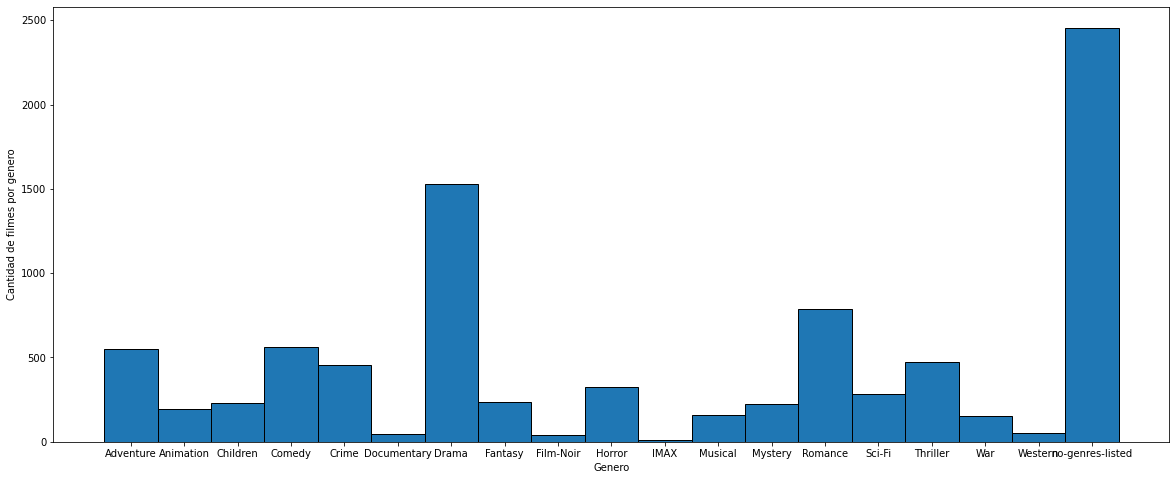

In [337]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(x=h, height=J, width=1, edgecolor="black")
ax.set_xlabel('Genero')
ax.set_ylabel('Cantidad de filmes por genero')


In [338]:
#Codificando los generos cinematograficos para poderlos usar en la prediccion
GENERO_MAPEO = { "Adventure":1,"Animation":2,"Children":3,"Comedy":4,"Crime":5,"Documentary":6,"Drama":7,"Fantasy":8,"Film-Noir":9,"Horror":10,"IMAX":11,"Musical":12,"Mystery":13,"Romance":14,"Sci-Fi":15,"Thriller":16,"War":17,"Western":18,"no-genres-listed":0}
list_genero=clean_datos['Clasificacion 1']
list_genero= list_genero.map(GENERO_MAPEO).astype(int)
clean_datos['Clasificacion 1']=list_genero
list_genero2=clean_datos['Clasificacion 2']
list_genero2= list_genero2.map(GENERO_MAPEO).astype(int)
clean_datos['Clasificacion 2']=list_genero2
clean_datos

<ipython-input-338-dc3d3d973b29>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-338-dc3d3d973b29>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Pelicula,Titulo,Clasificacion 1,Clasificacion 2,year,rating,imdbId,tmdbId
0,1,Toy Story,2,3,1995.0,4.0,114709,862.0
1,2,Jumanji,3,8,1995.0,4.0,113497,8844.0
2,3,Grumpier Old Men,14,0,1995.0,4.5,113228,15602.0
3,4,Waiting to Exhale,7,14,1995.0,2.5,114885,31357.0
4,5,Father of the Bride Part II,0,0,1995.0,4.5,113041,11862.0
...,...,...,...,...,...,...,...,...
8776,128975,Hot Tub Time Machine 2,15,0,2015.0,4.0,2637294,243938.0
8777,128991,Johnny Express,4,15,2014.0,4.5,3723996,269711.0
8778,129011,Eddie Izzard: Glorious,0,0,1997.0,4.5,195753,13590.0
8779,129229,Northmen - A Viking Saga,1,0,2014.0,5.0,2290553,286873.0


In [339]:
train=clean_datos.drop(['Titulo'], axis=1)
train

,Pelicula,Clasificacion 1,Clasificacion 2,year,rating,imdbId,tmdbId
0,1,2,3,1995.0,4.0,114709,862.0
1,2,3,8,1995.0,4.0,113497,8844.0
2,3,14,0,1995.0,4.5,113228,15602.0
3,4,7,14,1995.0,2.5,114885,31357.0
4,5,0,0,1995.0,4.5,113041,11862.0
...,...,...,...,...,...,...,...
8776,128975,15,0,2015.0,4.0,2637294,243938.0
8777,128991,4,15,2014.0,4.5,3723996,269711.0
8778,129011,0,0,1997.0,4.5,195753,13590.0
8779,129229,1,0,2014.0,5.0,2290553,286873.0


In [340]:
clean_datos.dtypes

Pelicula             int64
Titulo              object
Clasificacion 1      int64
Clasificacion 2      int64
year               float64
rating             float64
imdbId               int64
tmdbId             float64
dtype: object

In [341]:
clean_datos['Pelicula'] = clean_datos['Pelicula'].astype('float64')
clean_datos['year'] = clean_datos['year'].astype('float64')

<ipython-input-341-ff272d712376>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-341-ff272d712376>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [342]:
scaler = MinMaxScaler()
X = scaler.fit_transform(train)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc = StandardScaler()
#X = X.values
X_std =  sc.fit_transform(train)  
cov_matrix = np.cov(X_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(X_std)

[[-0.7920866  -0.7332432  -0.22079017 ...  0.43405524 -0.52054951
  -0.63184101]
 [-0.79205997 -0.55671834  0.57593251 ...  0.43405524 -0.52245988
  -0.47248184]
 [-0.79203334  1.38505518 -0.69882378 ...  0.91650383 -0.52288388
  -0.3375596 ]
 ...
 [ 2.64368935 -1.08629293 -0.69882378 ...  0.91650383 -0.39280671
  -0.37772881]
 [ 2.64949509 -0.90976806 -0.69882378 ...  1.39895241  2.90904906
   5.07831637]
 [ 2.65005436 -1.08629293 -0.69882378 ...  1.39895241  3.92243097
   5.84666236]]


In [343]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained)

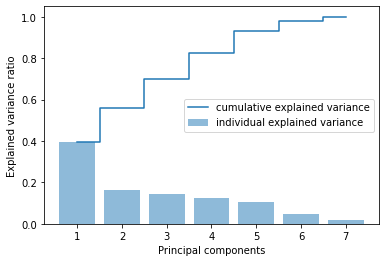

In [344]:
plt.bar(range(1,len(var_explained)+1), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(var_explained)+1),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [345]:
pca = PCA(n_components = 4)
pca.fit(X_std)
x_pca = pca.transform(X_std)
pca.explained_variance_ratio_

array([0.39605904, 0.16300866, 0.14215338, 0.12420067])

In [346]:
pca.explained_variance_ratio_.sum()

0.8254217518440271

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4).fit(X)
principal_comps = pca.transform(X)
pca_db = pd.DataFrame(data = principal_comps, columns=['pca1', 'pca2','pca3','pca4'])
pca_db

In [ ]:
pca_db.var()

In [ ]:
pca.components_

In [350]:
print(pca.explained_variance_ratio_)

[0.31477832 0.27422807 0.21574732 0.12681491]


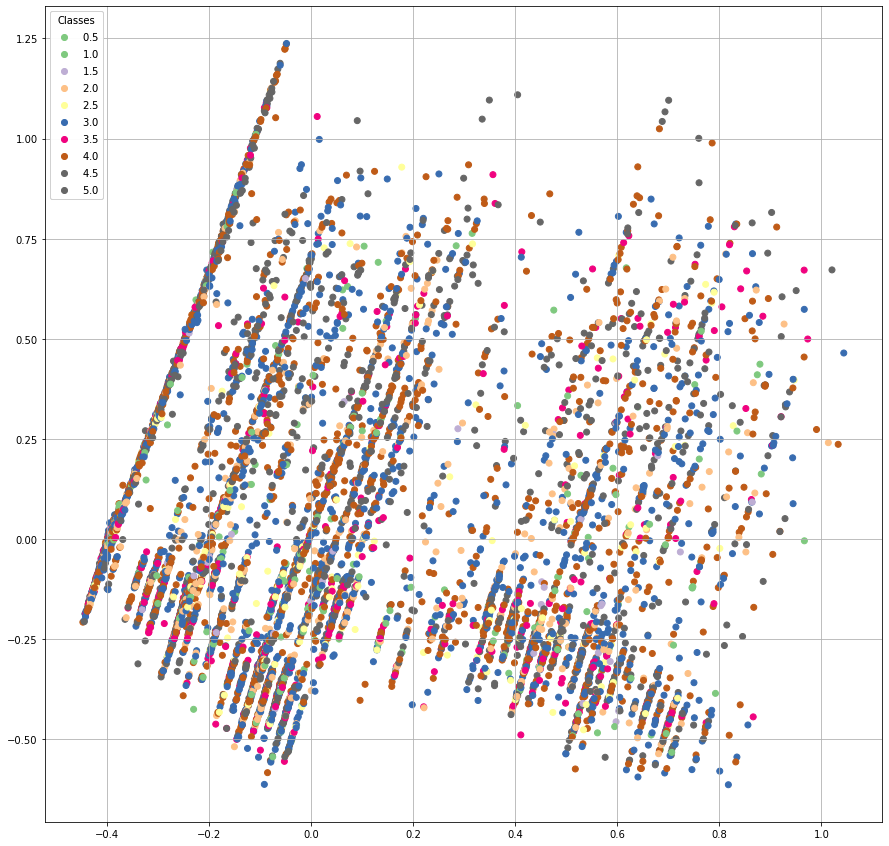

In [351]:
# y visualicemos el resultado
fig, ax = plt.subplots(figsize=(15, 15))
Y=datos1['rating']
grafico=pca_db
grafico['class']=Y
scatter = ax.scatter(grafico['pca1'],grafico['pca2'],c=grafico['class'], cmap="Accent")
legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="Classes")
ax.add_artist(legend1)
ax.grid(True)
plt.show()

In [ ]:
# Entrenemos el modelo
x_train=pca_db
y_train=train['Clasificacion 1']
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=1000, tol=1e-3)
model.fit(x_train, y_train)

In [368]:
from sklearn import metrics

predicted_train = model.predict(x_train)
metrics.accuracy_score(y_train, predicted_train)

0.5030206314829591

In [374]:
#Llevando los componentes de pruba al mismo redimensionamiento que los de entrenamiento
x_reduced=pca_db
#y_test=text['Clasificacion 1']

x_test=text.drop(['Clasificacion 1','Titulo'], axis=1)

list_g=text['Clasificacion 1']
list_g= list_g.map(GENERO_MAPEO).astype(int)
y_test=list_g

list_g2=x_test['Clasificacion 2']
list_g2= list_g2.map(GENERO_MAPEO).astype(int)
x_test['Clasificacion 2']=list_g2
#x_train, x_test, y_train, y_test = train_test_split(x_reduced, Y, test_size = 0.2, random_state = 1) 
x_test = scaler.fit_transform(x_test)
#y_test=scaler.fit_transform(y_test)

In [375]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), PCA(n_components=4), SGDClassifier(max_iter=10000, tol=1e-3))    

pipe.fit(x_train, y_train)
pipe_test = pipe.predict(x_test)
metrics.accuracy_score(y_test, pipe_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



ValueError: ignored

In [ ]:
import seaborn as sn
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 400):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sn.lineplot(x=list(range(1, 400)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

KeyboardInterrupt: ignored

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


In [ ]:
# 20 cluster
km20= KMeans(n_clusters=20).fit(X)

X['Labels'] = km20.labels_
plt.figure(figsize=(12, 8))
sn.scatterplot(x=X['pca1'], y=X['pca2'], hue=X['Labels'], 
                palette=sn.color_palette('hls',20), cmap="Dark1")
plt.title('KMeans  20 Clusters')
plt.show()